In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
dataset = pd.read_csv('Travel.csv')

In [4]:
dataset.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
dataset.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
dataset.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
dataset['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
for i in range(len(dataset.columns)):
    print(dataset.columns[i],dataset[dataset.columns[i]].dtype)
    print(dataset[dataset.columns[i]].value_counts()) if dataset[dataset.columns[i]].dtype == 'object' else None
    print('-----------------------------------')    

CustomerID int64
-----------------------------------
ProdTaken int64
-----------------------------------
Age float64
-----------------------------------
TypeofContact object
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
-----------------------------------
CityTier int64
-----------------------------------
DurationOfPitch float64
-----------------------------------
Occupation object
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
-----------------------------------
Gender object
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
-----------------------------------
NumberOfPersonVisiting int64
-----------------------------------
NumberOfFollowups float64
-----------------------------------
ProductPitched object
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: co

In [9]:
dataset['Gender']= dataset['Gender'].replace('Fe Male','Female')

dataset['MaritalStatus']= dataset['MaritalStatus'].replace('Unmarried','Single')



In [10]:
dataset['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [11]:
##missing values

dataset.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [12]:
##get percentae of missing values in each column
features_with_na = [ features  for features in dataset.columns if dataset[features].isnull().sum()>= 1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100,4), '% missing values with datatype:',dataset[feature].dtype)


Age 4.6236 % missing values with datatype: float64
TypeofContact 0.5115 % missing values with datatype: object
DurationOfPitch 5.135 % missing values with datatype: float64
NumberOfFollowups 0.9206 % missing values with datatype: float64
PreferredPropertyStar 0.5319 % missing values with datatype: float64
NumberOfTrips 2.8642 % missing values with datatype: float64
NumberOfChildrenVisiting 1.3502 % missing values with datatype: float64
MonthlyIncome 4.7668 % missing values with datatype: float64


In [13]:
dataset[features_with_na].describe()


,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [14]:
import warnings

warnings.filterwarnings("ignore")

#impute missing values

dataset.Age.fillna(dataset.Age.median(),inplace=True)

#dataset.TypeofContact.fillna(dataset.TravelTime.mode(),inplace=True)
dataset.TypeofContact.fillna(dataset.TypeofContact.mode()[0],inplace=True)

dataset.DurationOfPitch.fillna(dataset.DurationOfPitch.median(),inplace=True)

dataset.NumberOfFollowups.fillna(dataset.NumberOfFollowups.median(),inplace=True)

dataset.PreferredPropertyStar.fillna(dataset.PreferredPropertyStar.median(),inplace=True)

dataset.NumberOfTrips.fillna(dataset.NumberOfTrips.median(),inplace=True)

dataset.NumberOfChildrenVisiting.fillna(dataset.NumberOfChildrenVisiting .mode()[0],inplace=True)

dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median(),inplace=True)


In [15]:
dataset.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [16]:
dataset.drop('CustomerID',axis=1,inplace=True)

Feature Engineering

In [17]:
#create new feature

dataset['TotalVisitors'] = dataset.NumberOfPersonVisiting + dataset.NumberOfChildrenVisiting

dataset.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [19]:
#train test split
from sklearn.model_selection import train_test_split

X=dataset.drop('ProdTaken',axis=1)
y=dataset['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [20]:

X_train.shape, X_test.shape


((3910, 17), (978, 17))

In [21]:
cat_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(exclude=['object']).columns
cat_features, num_features

(Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation'],
       dtype='object'),
 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
        'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
        'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisitors'],
       dtype='object'))

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

In [23]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## ML models training

In [24]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score,roc_curve


## ML models training

models = {
    'RandomForest': RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    
}


for i in range((len(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    ##make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')





RandomForest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9305
- F1 score: 0.9255
- Precision: 0.9624
- Recall: 0.6702
- Roc Auc Score: 0.8319


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9192
- F1 score: 0.9180
- Precision: 0.8182
- Recall: 0.7539
- Roc Auc Score: 0.8566


GradientBoosting
Model performance for Training set
- Accuracy: 0.8939
- F1 score: 0.8819
- Precision: 0.8756
- Recall: 0.5021
- Roc Auc Score: 0.7429
----------------------------------
Model performance for Test set
- Accuracy: 0.8589
- F1 score: 0.8398
- Precision: 0.7732
- Recall: 0.3927
- Roc Auc Score: 0.6824




In [25]:
##random forest hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    "max_features": [5, 7, "auto", 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


training Random forest with hyperparameters

In [26]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=20, max_features=7, min_samples_split=2, min_samples_leaf=1)
    
}


for i in range((len(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    ##make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')


RandomForest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9274
- F1 score: 0.9221
- Precision: 0.9545
- Recall: 0.6597
- Roc Auc Score: 0.8260




Plot Graph

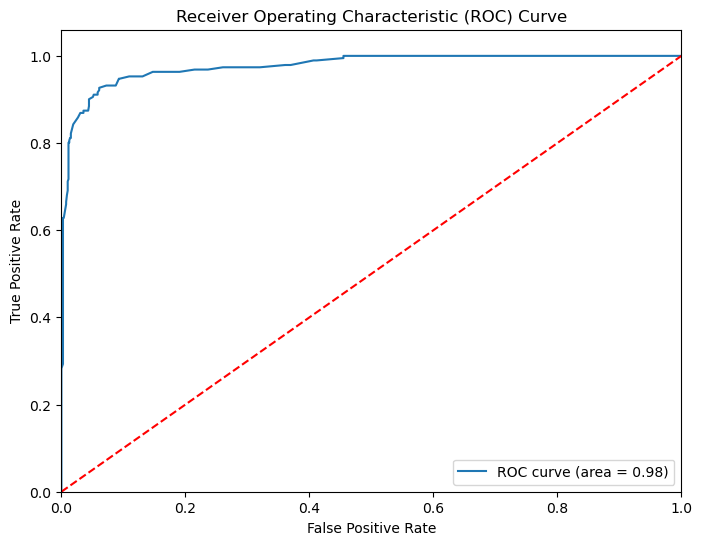

In [27]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve

plt.figure(figsize=(8,6))

y_test_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_test_proba)))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.06])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Create genric ROC AUC Curve template

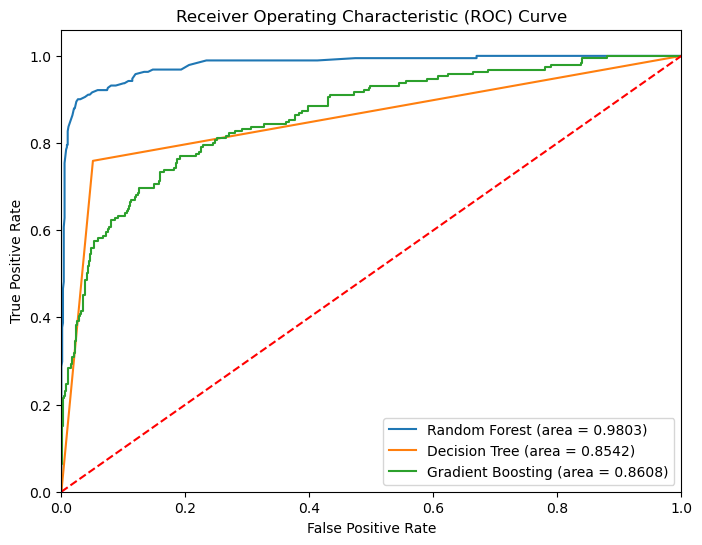

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

## Create genric ROC AUC Curve template

plt.figure(figsize=(8,6))

models = [

    {'label': 'Random Forest', 
     'model': RandomForestClassifier(n_estimators=100, max_depth=20, max_features=7, min_samples_split=2, min_samples_leaf=1),
     'auc':0.8325
    },
    {
        'label': 'Decision Tree', 
        'model': DecisionTreeClassifier(),
        'auc':0.7722
    },
    {
        'label': 'Gradient Boosting', 
        'model': GradientBoostingClassifier(),
        'auc':0.8234
    }
]


for m in models:
    model = m['model']
    label = m['label']
    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label='{} (area = {:.4f})'.format(label, auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.06])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
